In [2758]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2759]:
#read initial csv into a dataframe
csv_file = 'Main Avocado Tree (Resources)/avocado-updated-2020.csv'
avocado_df = pd.read_csv(csv_file)
avocado_df


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [2760]:
#read income csv into a dataframe
csv_income = 'Main Avocado Tree (Resources)/income per metropolitan area.csv'
income_df = pd.read_csv(csv_income)
income_df.head()

,Geography,State,Year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [2761]:
#Rename columns to match those in Avocado
rename_income_df = income_df.rename(columns={"Geography": "geography", "Year":"year"})
rename_income_df.head()

,geography,State,year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [2762]:
#Merge the two dataframes together on Geography and year
merged_df = pd.merge(avocado_df,rename_income_df, on=['geography', 'year'], how='inner')
merged_df


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,State,Per capita personal income
0,2017-01-01,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,conventional,2017,Albany,GA,36780
1,2017-01-01,1.87,1376.70,71.65,192.63,0.00,1112.42,1112.42,0.00,0.00,organic,2017,Albany,GA,36780
2,2017-01-08,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,conventional,2017,Albany,GA,36780
3,2017-01-08,1.94,2229.52,63.46,478.31,0.00,1687.75,1687.75,0.00,0.00,organic,2017,Albany,GA,36780
4,2017-01-15,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,conventional,2017,Albany,GA,36780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,2019-12-15,1.34,3895.70,253.86,130.50,0.00,3511.34,1161.84,2349.50,0.00,organic,2019,Syracuse,NY,52051
3076,2019-12-22,1.09,75058.95,3277.09,42043.81,50.00,29688.05,9821.50,18648.77,1217.78,conventional,2019,Syracuse,NY,52051
3077,2019-12-22,1.58,2610.75,124.88,72.44,0.00,2413.43,1181.44,1231.99,0.00,organic,2019,Syracuse,NY,52051
3078,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,1032.23,conventional,2019,Syracuse,NY,52051


In [2763]:
#Changing Date to ONLY reflect the month
split_cols = merged_df['date'].str.split('-',expand=True)
split_cols.columns = [f'Split-{i}' for i in range(3)]
new_merge = merged_df.join(split_cols)
new_merge

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,State,Per capita personal income,Split-0,Split-1,Split-2
0,2017-01-01,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,conventional,2017,Albany,GA,36780,2017,01,01
1,2017-01-01,1.87,1376.70,71.65,192.63,0.00,1112.42,1112.42,0.00,0.00,organic,2017,Albany,GA,36780,2017,01,01
2,2017-01-08,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,conventional,2017,Albany,GA,36780,2017,01,08
3,2017-01-08,1.94,2229.52,63.46,478.31,0.00,1687.75,1687.75,0.00,0.00,organic,2017,Albany,GA,36780,2017,01,08
4,2017-01-15,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,conventional,2017,Albany,GA,36780,2017,01,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,2019-12-15,1.34,3895.70,253.86,130.50,0.00,3511.34,1161.84,2349.50,0.00,organic,2019,Syracuse,NY,52051,2019,12,15
3076,2019-12-22,1.09,75058.95,3277.09,42043.81,50.00,29688.05,9821.50,18648.77,1217.78,conventional,2019,Syracuse,NY,52051,2019,12,22
3077,2019-12-22,1.58,2610.75,124.88,72.44,0.00,2413.43,1181.44,1231.99,0.00,organic,2019,Syracuse,NY,52051,2019,12,22
3078,2019-12-29,1.12,67860.40,2800.47,39432.09,51.00,25576.84,6601.50,17943.11,1032.23,conventional,2019,Syracuse,NY,52051,2019,12,29


In [2764]:
#make it pretty
renamed_merge = new_merge.rename(columns={'Split-1':'month', 'geography':'city'})
clean_merge = renamed_merge[['month', 'year', 'city', 'average_price', 'total_volume','Per capita personal income', '4046', '4225', '4770', 'type']]
clean_merge.head()

,month,year,city,average_price,total_volume,Per capita personal income,4046,4225,4770,type
0,01,2017,Albany,1.47,129948.23,36780,4845.77,117027.41,200.36,conventional
1,01,2017,Albany,1.87,1376.70,36780,71.65,192.63,0.00,organic
2,01,2017,Albany,1.55,91728.18,36780,3355.47,75641.23,56.91,conventional
3,01,2017,Albany,1.94,2229.52,36780,63.46,478.31,0.00,organic
4,01,2017,Albany,1.55,88526.26,36780,3327.65,71956.77,607.03,conventional


In [2765]:
# Question 1: Which cities love avocados most?

#Task 1: popularity of avocado, visual heatmap, 2015 to 2020, bar graph of volume per area 

In [2766]:
#Question 2: Do states with higher income per capita buy more avocados? (income per capita from 2017-2019)

#Task 2: line graph (x-values states, y-values income per capita and avocado revenue) 

In [2767]:
#convert date into three columns
split_cols = avocado_df['date'].str.split('-',expand=True)
split_cols.columns = [f'Split-{i}' for i in range(3)]
avocado_df = avocado_df.join(split_cols)
#rename splits to day, month
avocado_df = avocado_df.rename(columns={'Split-1':'month','Split-2':'day'})
#drop Split-0 due to redundancy with year column
avocado_df = avocado_df.drop(['Split-0'], axis=1)
#better geography match
#used https://hassavocadoboard.com/category-data to confirm state match to income data
#Drop Cities with same name, wrong state from income data
#Drop all Springfields except Springfield MA from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'MO')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'IL')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'OH')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Eugene-Springfield') & (rename_income_df['State'] == ' OR')].index)
#Drop Albanies not NY from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Albany-Lebanon') & (rename_income_df['State'] == ' OR')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Albany') & (rename_income_df['State'] == ' GA')].index)
#Drop all Columbuses not OH from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Columbus') & (rename_income_df['State'] == ' GA-AL')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Columbus') & (rename_income_df['State'] == ' IN')].index)
#Drop all Jacksonvilles not FL
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Jacksonville') & (rename_income_df['State'] == ' NC')].index)
#Drop all Portlands not OR
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Portland-South Portland') & (rename_income_df['State'] == ' ME')].index)
#Drop all Rochesters not NY
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Rochester') & (rename_income_df['State'] == ' MN')].index)

#text to column cities in income and avocado data
columnTOtext1 = rename_income_df['geography'].str.split('-',expand=True)
columnTOtext1.columns = [f'geography-{i}' for i in range(4)]
new_income = rename_income_df.join(columnTOtext1)
new_income = new_income.drop(['geography'], axis=1)
columnTOtext = avocado_df['geography'].str.split('/',expand=True)
columnTOtext.columns = [f'geography-{i}' for i in range(2)]
new_avocado = avocado_df.join(columnTOtext)
new_avocado = new_avocado.drop(['geography'], axis=1)

#keep rows that only have one city
second_cities = new_income['geography-1'].unique()
second_cities = second_cities.tolist()
del second_cities[0]

new_income_first = new_income[~new_income['geography-1'].isin(second_cities)]
new_income_first = new_income_first.drop(['geography-1', 'geography-2', 'geography-3'], axis=1)
#merge data frame based on new_income_first
first = new_avocado.merge(new_income_first, how='inner', on=['geography-0', 'year'])
first_geo_0 = first['geography-0'].unique()
first_geo_0 = first_geo_0.tolist()
first_geo_1 = first['geography-1'].unique()
#remove already merged cities from new_avocado
new_avocado = new_avocado[~new_avocado['geography-0'].isin(first_geo_0)]
#keep rows that only have a two cities
new_income_second = new_income.dropna(subset=['geography-1'])
new_avocado_second = new_avocado.dropna(subset=['geography-1'])
third_cities = new_income_second['geography-2'].unique()
third_cities = third_cities.tolist()
del third_cities[2]

new_income_second = new_income_second[~new_income_second['geography-2'].isin(third_cities)]
new_income_second = new_income_second.drop(['geography-2', 'geography-3'], axis=1)

#merge data frame based on new_income_second
second = new_avocado.merge(new_income_second, how='inner', on=['geography-0', 'year'])
second = second.drop(['geography-1_y'], axis=1)
second = second.rename(columns={'geography-1_x':'geography-1'})
second_geo_0 = second['geography-0'].unique()
second_geo_0 = second_geo_0.tolist()
#remove already merged cities
new_avocado = new_avocado[~new_avocado['geography-0'].isin(second_geo_0)]
#keep rows that only have a three cities
new_income_third = new_income.dropna(subset=['geography-2'])
fourth_cities = new_income_third['geography-3'].unique()
fourth_cities = fourth_cities.tolist()
del fourth_cities[0]

new_income_third = new_income_third[~new_income_third['geography-3'].isin(fourth_cities)]
new_income_third = new_income_third.drop(['geography-3'], axis=1)

#merge dataframes
third = new_avocado.merge(new_income_third, how='inner', on=['geography-0', 'year'])
third = third.drop(['geography-1_y', 'geography-2'], axis=1)
third = third.rename(columns={'geography-1_x':'geography-1'})
third_geo_0 = third['geography-0'].unique()
third_geo_0 = third_geo_0.tolist()
#remove already merged cities
new_avocado = new_avocado[~new_avocado['geography-0'].isin(third_geo_0)]
#keep rows that only have a four cities
new_income_fourth = new_income.dropna(subset=['geography-3'])

#merge dataframes
fourth = new_avocado.merge(new_income_fourth, how='inner', on=['geography-0', 'year'])
fourth = fourth.drop(['geography-1_y', 'geography-2', 'geography-3'], axis=1)
fourth = fourth.rename(columns={'geography-1_x':'geography-1'})

#combine merged dataframes into one
income_avocado = first.append(second)
income_avocado = income_avocado.append(third)
income_avocado = income_avocado.append(fourth)

#get list of cities in dataframe
unique_cities = income_avocado['geography-0'].unique()
unique_cities = unique_cities.tolist()
income_avocado.reset_index()
income_avocado






,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,month,day,geography-0,geography-1,State,Per capita personal income
0,2017-01-01,0.64,329279.29,2646.83,130250.60,2530.91,193850.95,30669.35,163180.08,1.52,conventional,2017,01,01,Cincinnati,Dayton,OH-KY-IN,51844
1,2017-01-01,1.23,10798.25,351.72,8558.19,0.00,1888.34,293.33,1595.01,0.00,organic,2017,01,01,Cincinnati,Dayton,OH-KY-IN,51844
2,2017-01-08,0.82,285027.21,4147.01,126967.13,991.09,152921.98,33746.17,118612.86,562.95,conventional,2017,01,08,Cincinnati,Dayton,OH-KY-IN,51844
3,2017-01-08,1.07,12346.01,323.43,6801.77,0.00,5220.81,654.36,4566.45,0.00,organic,2017,01,08,Cincinnati,Dayton,OH-KY-IN,51844
4,2017-01-15,0.76,346523.78,2939.57,125731.86,994.43,216857.92,29095.07,187759.83,3.02,conventional,2017,01,15,Cincinnati,Dayton,OH-KY-IN,51844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2019-12-15,1.58,7481.67,60.37,891.36,0.00,6529.94,3934.64,2595.30,0.00,organic,2019,12,15,Nashville,None,TN,60680
304,2019-12-22,0.88,210276.00,85573.42,6270.17,329.50,118102.91,96998.28,20685.57,419.06,conventional,2019,12,22,Nashville,None,TN,60680
305,2019-12-22,1.32,10033.83,66.47,698.10,0.00,9269.26,6199.39,3069.87,0.00,organic,2019,12,22,Nashville,None,TN,60680
306,2019-12-29,0.82,230398.16,97961.88,5935.34,219.98,126280.96,107077.99,18849.51,353.46,conventional,2019,12,29,Nashville,None,TN,60680


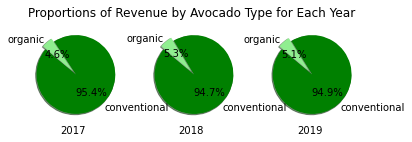

In [2768]:
#convert date into three columns
split_cols = avocado_df['date'].str.split('-',expand=True)
split_cols.columns = [f'Split-{i}' for i in range(3)]
avocado_df = avocado_df.join(split_cols)
#rename splits to day, month
avocado_df = avocado_df.rename(columns={'Split-1':'month','Split-2':'day'})
#drop Split-0 due to redundancy with year column
avocado_df = avocado_df.drop(['Split-0'], axis=1)
#better geography match
#used https://hassavocadoboard.com/category-data to confirm state match to income data
#Drop Cities with same name, wrong state from income data
#Drop all Springfields except Springfield MA from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'MO')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'IL')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'OH')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Eugene-Springfield') & (rename_income_df['State'] == ' OR')].index)
#Drop Albanies not NY from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Albany-Lebanon') & (rename_income_df['State'] == ' OR')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Albany') & (rename_income_df['State'] == ' GA')].index)
#Drop all Columbuses not OH from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Columbus') & (rename_income_df['State'] == ' GA-AL')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Columbus') & (rename_income_df['State'] == ' IN')].index)
#Drop all Jacksonvilles not FL
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Jacksonville') & (rename_income_df['State'] == ' NC')].index)
#Drop all Portlands not OR
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Portland-South Portland') & (rename_income_df['State'] == ' ME')].index)
#Drop all Rochesters not NY
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Rochester') & (rename_income_df['State'] == ' MN')].index)

#text to column cities in income and avocado data
columnTOtext1 = rename_income_df['geography'].str.split('-',expand=True)
columnTOtext1.columns = [f'geography-{i}' for i in range(4)]
new_income = rename_income_df.join(columnTOtext1)
new_income = new_income.drop(['geography'], axis=1)
columnTOtext = avocado_df['geography'].str.split('/',expand=True)
columnTOtext.columns = [f'geography-{i}' for i in range(2)]
new_avocado = avocado_df.join(columnTOtext)
new_avocado = new_avocado.drop(['geography'], axis=1)

#keep rows that only have one city
second_cities = new_income['geography-1'].unique()
second_cities = second_cities.tolist()
del second_cities[0]

new_income_first = new_income[~new_income['geography-1'].isin(second_cities)]
new_income_first = new_income_first.drop(['geography-1', 'geography-2', 'geography-3'], axis=1)
#merge data frame based on new_income_first
first = new_avocado.merge(new_income_first, how='inner', on=['geography-0', 'year'])
first_geo_0 = first['geography-0'].unique()
first_geo_0 = first_geo_0.tolist()
first_geo_1 = first['geography-1'].unique()
#remove already merged cities from new_avocado
new_avocado = new_avocado[~new_avocado['geography-0'].isin(first_geo_0)]
#keep rows that only have a two cities
new_income_second = new_income.dropna(subset=['geography-1'])
new_avocado_second = new_avocado.dropna(subset=['geography-1'])
third_cities = new_income_second['geography-2'].unique()
third_cities = third_cities.tolist()
del third_cities[2]

new_income_second = new_income_second[~new_income_second['geography-2'].isin(third_cities)]
new_income_second = new_income_second.drop(['geography-2', 'geography-3'], axis=1)

#merge data frame based on new_income_second
second = new_avocado.merge(new_income_second, how='inner', on=['geography-0', 'year'])
second = second.drop(['geography-1_y'], axis=1)
second = second.rename(columns={'geography-1_x':'geography-1'})
second_geo_0 = second['geography-0'].unique()
second_geo_0 = second_geo_0.tolist()
#remove already merged cities
new_avocado = new_avocado[~new_avocado['geography-0'].isin(second_geo_0)]
#keep rows that only have a three cities
new_income_third = new_income.dropna(subset=['geography-2'])
fourth_cities = new_income_third['geography-3'].unique()
fourth_cities = fourth_cities.tolist()
del fourth_cities[0]

new_income_third = new_income_third[~new_income_third['geography-3'].isin(fourth_cities)]
new_income_third = new_income_third.drop(['geography-3'], axis=1)

#merge dataframes
third = new_avocado.merge(new_income_third, how='inner', on=['geography-0', 'year'])
third = third.drop(['geography-1_y', 'geography-2'], axis=1)
third = third.rename(columns={'geography-1_x':'geography-1'})
third_geo_0 = third['geography-0'].unique()
third_geo_0 = third_geo_0.tolist()
#remove already merged cities
new_avocado = new_avocado[~new_avocado['geography-0'].isin(third_geo_0)]
#keep rows that only have a four cities
new_income_fourth = new_income.dropna(subset=['geography-3'])

#merge dataframes
fourth = new_avocado.merge(new_income_fourth, how='inner', on=['geography-0', 'year'])
fourth = fourth.drop(['geography-1_y', 'geography-2', 'geography-3'], axis=1)
fourth = fourth.rename(columns={'geography-1_x':'geography-1'})

#combine merged dataframes into one
income_avocado = first.append(second)
income_avocado = income_avocado.append(third)
income_avocado = income_avocado.append(fourth)

#get list of cities in dataframe
unique_cities = income_avocado['geography-0'].unique()
unique_cities = unique_cities.tolist()
income_avocado.reset_index()
income_avocado






In [ ]:
#Question 3: Which type of avocado is the biggest source of revenue for suppliers? Erica

#create revenue column
income_avocado['revenue'] = round(income_avocado['average_price']*income_avocado['total_volume'], 2)

#list of unique years in data
years = income_avocado['year'].unique()
years = years.tolist()
years
#list of unique types in data
types = income_avocado_all['type'].unique()
types = types.tolist()
#seperate into dataframes for each year
typeANDrevenue_2017 = income_avocado.loc[income_avocado['year']==2017, ['type', 'revenue']]
typeANDrevenue_2018 = income_avocado.loc[income_avocado['year']==2018, ['type', 'revenue']]
typeANDrevenue_2019 = income_avocado.loc[income_avocado['year']==2019, ['type', 'revenue']]
#grouping by type
grouped_2017 = typeANDrevenue_2017.groupby('type')
grouped_2018 = typeANDrevenue_2018.groupby('type')
grouped_2019 = typeANDrevenue_2019.groupby('type')
#sum of revenues
revenues_2017 = grouped_2017.sum()
revenues_2018 = grouped_2018.sum()
revenues_2019 = grouped_2019.sum()
#Task 3: Three pie charts by type (value = revenue) for each year on one png 
colors = ['green', 'lightgreen']
explode = explode = (0.1,0)
#create subplots
figure, (ax1, ax2, ax3) = plt.subplots(1,3,subplot_kw={'aspect':'equal'})
ax1.pie(revenues_2017['revenue'], explode=(0.1,0), labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax2.pie(revenues_2018['revenue'], explode=(0.1,0), labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax3.pie(revenues_2019['revenue'], explode=(0.1,0), labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
#format
ax1.set_xlabel('2017')
ax2.set_xlabel('2018')
ax3.set_xlabel('2019')
ax2.set_title("Proportions of Revenue by Avocado Type for Each Year")

plt.show()
#fig.savefig('RevenueByTypeByYear.png')

In [2769]:
#Question 4: Is there a time of year that sees a spike in revenue? Erica

#Task 4: bar chart (x-values months, y-values avocado revenue)

In [2770]:
#Question 5: How has the average avocado price changed over time?  What is the predicted avocado price for 2021 based on our data?  Bitty

#Task 5: scatter plot with regression to predict 2021 average price 

In [2771]:
#Question 6: Do different types of avocados have different price trends? Arianne

#Task 6: facet (multiple lines on one) line graph (x-values = year, y-values = average price) for each type

In [2772]:
#look at volume for 4046
plot_4046 = [['4046','year','average_price']]


In [2773]:
#look at volume for 4225
plot_4225= [['4225', 'year', 'average_price']]

In [2774]:
#Look at Volume for 4770
plot_4770 = [['4770', 'year', 'average_price']]
